<a href="https://colab.research.google.com/github/bdvikku/Stock-Market-Prediction-using-Machine-Learning-/blob/main/Stock_Market_Prediction_Using_Machine_Learning_algorithm_lstm_and_bilstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import math

#EDA (Exploratory Data Analysis).

In [ ]:
df = pd.read_csv('/content/TSLA (1).csv', parse_dates = ['Date'], index_col = 'Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2021-09-27,773.119995,799.000000,769.309998,791.359985,791.359985,28070700
2021-09-28,787.200012,795.640015,766.179993,777.559998,777.559998,25381400
2021-09-29,779.799988,793.500000,770.679993,781.309998,781.309998,20942900


In [ ]:
print('First Trade observation date: %s \nLast Trade observation date: %s' % (df.index[0].date(), df.index[-1].date()))

First Trade observation date: 2010-06-29 
Last Trade observation date: 2021-10-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2836 entries, 2010-06-29 to 2021-10-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2836 non-null   float64
 1   High       2836 non-null   float64
 2   Low        2836 non-null   float64
 3   Close      2836 non-null   float64
 4   Adj Close  2836 non-null   float64
 5   Volume     2836 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 155.1 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2.836000e+03
mean,103.610480,105.748494,101.314558,103.667893,103.667893,3.149903e+07
std,184.946076,188.686731,180.807114,185.049563,185.049563,2.848471e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,10.160000,10.412500,10.024000,10.173000,10.173000,1.249250e+07
50%,45.841002,46.463002,45.045000,45.833000,45.833000,2.495650e+07
75%,64.716498,65.869497,63.638500,65.046000,65.046000,4.028538e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


In [ ]:
# Check for missing values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#We can observe that Close and Adj Close has no varaince. So, we can drop Adj Close column.
print(np.var(df['Close'] - df['Adj Close']))

0.0


In [ ]:
df.drop(['Adj Close'], inplace = True, axis = 1)

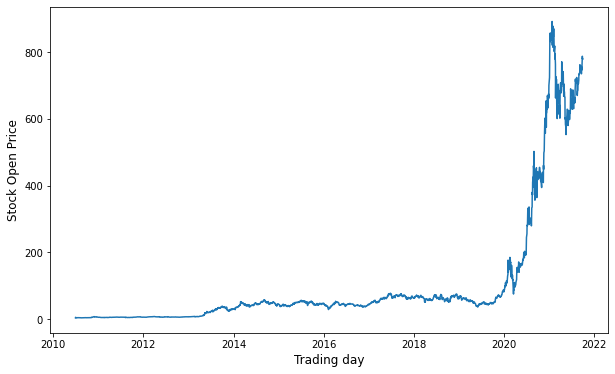

In [ ]:
#Plot Time-Series
from matplotlib import pyplot as plt
# Define a function to draw time_series plot
def timeseries (x_axis, y_axis, x_label, y_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis)
    #plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12})
    plt.ylabel(y_label, {'fontsize': 12})

timeseries(df.index, df['Open'], 'Trading day', 'Stock Open Price')

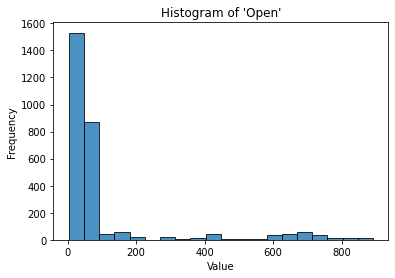

In [ ]:
def plot_histogram(x):
    plt.hist(x, bins = 20, alpha=0.8, edgecolor = 'black')
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plot_histogram(df['Open'])

Dimension of train data:  (1106, 5)
Dimension of test data:  (453, 5)


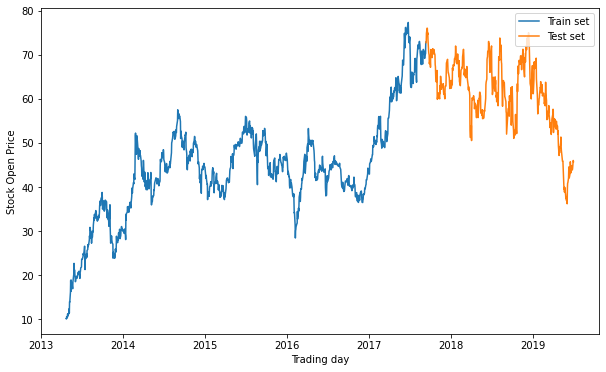

In [ ]:
train_size = int(len(df)*0.8)
train_size1 = int(len(df)*0.64)
train_size2 = int(len(df)*0.25)
train_dataset, test_dataset = df.iloc[train_size2:train_size1], df.iloc[train_size1:train_size]

# Plot train and test data
plt.figure(figsize = (10, 6))
plt.plot(train_dataset.Open)
plt.plot(test_dataset.Open)
plt.xlabel('Trading day')
plt.ylabel('Stock Open Price')
plt.legend(['Train set', 'Test set'], loc='upper right')
#plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/2.jpg', format='jpg', dpi=1000)

print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

In [ ]:
# Split train data to X and y
X_train = train_dataset.drop('Open', axis = 1)
y_train = train_dataset.loc[:,['Open']]

# Split test data to X and y
X_test = test_dataset.drop('Open', axis = 1)
y_test = test_dataset.loc[:,['Open']]

In [ ]:
X_test.shape, y_test.shape

((453, 4), (453, 1))

In [ ]:
#Good rule of thumb is that normalized data lead to better performance in Neural Networks. I used MinMaxScaler from sklearn.
from sklearn.preprocessing import MinMaxScaler
# Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

In [ ]:
X_test.shape, y_test.shape

((453, 4), (453, 1))

In [ ]:
#LSTM and BiLSTM take a 3D input (num_samples, num_timesteps, num_features).
#Time_steps = 30. It means that the model makes predictions based on the last 30-day data 
# In the loop, it takes 30 days data and create a list out of it and append. For target value 30 th day will become the first ouput. 
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
        
    return np.array(Xs), np.array(ys)


TIME_STEPS = 30

X_test, y_test = create_dataset(test_x_norm, test_y_norm, TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm, TIME_STEPS)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1076, 30, 4)
y_train.shape:  (1076, 1)
X_test.shape:  (423, 30, 4)
y_test.shape:  (423, 1)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

# Create BiLSTM model, no of neurons is imput
def create_model_bilstm(units):
    model = Sequential()
    # First layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units, return_sequences=True), 
                            input_shape=(X_train.shape[1], X_train.shape[2])))
    # Second layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model


# Create LSTM model, Input is neurons and model type
def create_model(units, m):
    model = Sequential()
    # First layer of LSTM
    model.add(m (units = units, return_sequences = True, 
                 input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Second layer of LSTM
    model.add(m (units = units))                 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model


# BiLSTM
model_bilstm = create_model_bilstm(64)

# GRU and LSTM 
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

In [ ]:
# Fit BiLSTM and LSTM
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)

    # shuffle = False because the order of the data matters
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,
                    batch_size = 32, shuffle = False, callbacks = [early_stop])
    return history

print("BI- DIRECTIONAL LSTM OUTPUT.")
history_bilstm = fit_model(model_bilstm)
print()
print("LSTM OUTPUT.")
history_lstm = fit_model(model_lstm)


BI- DIRECTIONAL LSTM OUTPUT.
Epoch 1/100
27/27 [==============================] - 9s 99ms/step - loss: 0.0096 - val_loss: 0.0089
Epoch 2/100
27/27 [==============================] - 1s 49ms/step - loss: 0.0028 - val_loss: 0.0063
Epoch 3/100
27/27 [==============================] - 1s 48ms/step - loss: 0.0019 - val_loss: 0.0080
Epoch 4/100
27/27 [==============================] - 1s 50ms/step - loss: 0.0017 - val_loss: 0.0078
Epoch 5/100
27/27 [==============================] - 1s 50ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 6/100
27/27 [==============================] - 1s 50ms/step - loss: 9.0704e-04 - val_loss: 0.0026
Epoch 7/100
27/27 [==============================] - 1s 49ms/step - loss: 8.0470e-04 - val_loss: 0.0021
Epoch 8/100
27/27 [==============================] - 1s 51ms/step - loss: 7.8470e-04 - val_loss: 0.0016
Epoch 9/100
27/27 [==============================] - 1s 49ms/step - loss: 8.2966e-04 - val_loss: 0.0014
Epoch 10/100
27/27 [==============================] - 1

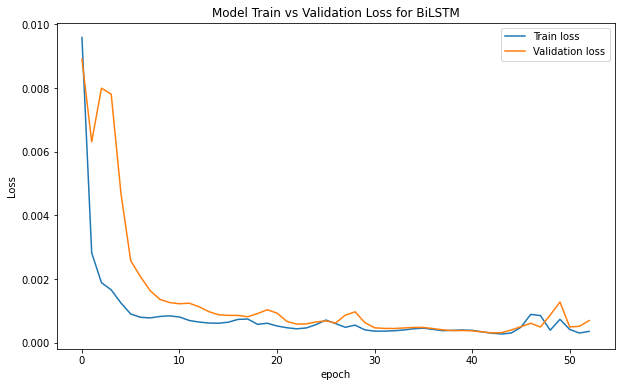

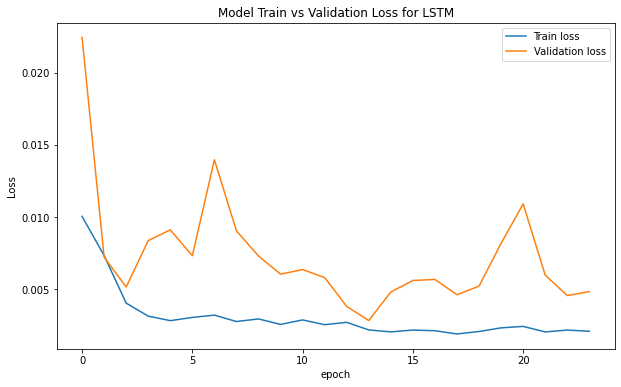

In [ ]:
#Plot train loss vs validation loss
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/loss_'+model_name+'.jpg', format='jpg', dpi=1000)

plot_loss (history_bilstm, 'BiLSTM')
plot_loss (history_lstm, 'LSTM')


In [ ]:
#After building the model, I have to transform the target variable back to original data space for train and test data using scaler_y.inverse_transform.
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

In [ ]:
#Make prediction using BiLSTM and LSTM 
def prediction(model):
    prediction = model.predict(X_test)
    #model predicted values will be scaled values and we need to transform to actual stock values
    prediction = scaler_y.inverse_transform(prediction)
    return prediction

prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)


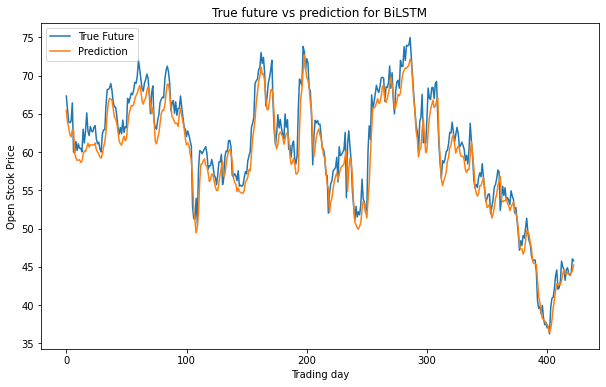

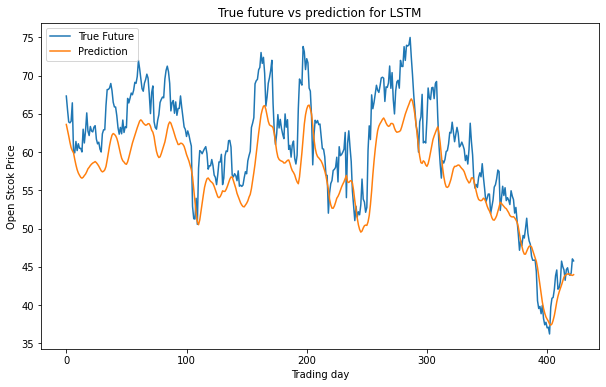

In [ ]:
#Plot true future vs prediction¶
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='True Future')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('True future vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Trading day')
    plt.ylabel('Open Stcok Price')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/predic_'+model_name+'.jpg', format='jpg', dpi=1000)
    
    
plot_future(prediction_bilstm, 'BiLSTM', y_test)
plot_future(prediction_lstm, 'LSTM', y_test)


When we split the data by 80-20, training set included data it 2019. Where as many variations to stock price happened in 2020 which is our test data here. It feels like traing data is not sufficeient to catch the trend in 2020 to do predictions correctly.

In [ ]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')


evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')
evaluate_prediction(prediction_lstm, y_test, 'LSTM')


Bidirectional LSTM:
Mean Absolute Error: 1.6988
Root Mean Square Error: 2.0896

LSTM:
Mean Absolute Error: 4.0424
Root Mean Square Error: 4.7725

